<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Fernando Becerra Saavedra </em><br>

</div>

# **Visualización de la Información: Tarea N° 4**
*24 de Octubre de 2024*

**Nombre Estudiante(s)**: `Jaime Castillo Castro - Kurt Castro Ortega - Sofía Vits Contreras - Erick Cisterna Contreras`


**Dataset:** World Happiness Report- 2024

**Fuente:** https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated/data

### **I. GENERALIDADES**

#### **1. Descripción general del dataset**

El **World Happiness Report 2024** es un conjunto de datos que evalúa el bienestar de los países a nivel global. Utiliza varios indicadores que intentan capturar la felicidad de los ciudadanos a través de múltiples dimensiones económicas, sociales y psicológicas.

#### **2. Columnas Dataset Principal**


1. **Country name**: El nombre del país evaluado.
2. **year**: El año en el que se tomaron las mediciones.
3. **Life Ladder**: Una medida de la felicidad subjetiva de los ciudadanos (en una escala de 0 a 10), conocida como el "escalera de la vida", donde las personas evalúan su vida actual.
4. **Log GDP per capita**: El PIB per cápita en una escala logarítmica. Representa la riqueza económica promedio de los ciudadanos en el país.
5. **Social support**: Un índice que mide el nivel de apoyo social, es decir, si las personas tienen alguien en quien confiar en momentos de necesidad.
6. **Healthy life expectancy at birth**: La esperanza de vida saludable al nacer, que mide cuántos años se espera que una persona viva en buena salud.
7. **Freedom to make life choices**: Índice que mide la percepción de las personas sobre su libertad para tomar decisiones importantes en su vida.
8. **Generosity**: Índice de generosidad, basado en la cantidad de donaciones y ayuda mutua dentro del país.
9. **Perceptions of corruption**: Mide la percepción pública sobre los niveles de corrupción en las instituciones del gobierno y los negocios.
10. **Positive affect**: La cantidad de experiencias positivas (como la risa y el disfrute) que una persona experimenta.
11. **Negative affect**: Mide el grado de experiencias negativas (como tristeza y enojo) que las personas experimentan.


#### **3. Columnas Dataset Secundario**


12. **Continent**: Esta columna proviene desde un dataset adicional que permite agrupar a los países por continente (por ejemplo, Asia, Europa, África, etc.).

#### **4. Propósito del dataset**

El objetivo de este dataset es proporcionar una medida comprensiva de la felicidad global. Los indicadores económicos como el PIB per cápita y la esperanza de vida saludable se combinan con variables sociales y emocionales, como el apoyo social y la percepción de corrupción, para crear una imagen más completa del bienestar de los ciudadanos en cada país.

### **II. DESARROLLO**

#### **Paso 1: Importación de Librerías**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib as mpl
from pySankey.sankey import sankey
import squarify
from flexitext import flexitext
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings("ignore")

#### **Paso 2: Carga de Datos**

A continuación, se carga la base de datos World-happiness-report-updated_2024 y adicionalmente se carga una base de datos de los paises por continente, la cual tiene por finalidad realizar un cruce de información y agregar una columna calculada en la base de datos inicial.

In [25]:
# Cargar el dataset principal
ruta = "../Data/World-happiness-report-updated_2024.csv"
df = pd.read_csv(ruta, encoding='latin1')

# Cargar el dataset de países y continentes
ruta_paises = "../Data/Countries by continents.csv"
df_paises_continente = pd.read_csv(ruta_paises, sep=';')

# los nombres de las columnas coincidan para la combinacion
df_paises_continente = df_paises_continente.rename(columns={'Country': 'Country name'})

# Combinar ambos datasets usando la columna 'Country name'
df_merged = pd.merge(df, df_paises_continente, on='Country name', how='left')

# Verificar las primeras filas para asegurarse de que el continente fue agregado
print(df_merged.head())

  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative affect Continent  

#### **Paso 3: Análisis Explotario**

In [26]:
# Mostrar el tamaño del dataframe
df_merged.shape

(2363, 12)

In [27]:
# Mostrar información de dataframe
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
 11  Continent                         2363 non-null   object 
dtypes: flo

In [28]:
# Separar variables numéricas
numerical_variables = df_merged.dtypes[df_merged.dtypes != 'object'].index
print('El número de variables numéricas es: ', len(numerical_variables))
print('Las variables numéricas son:', numerical_variables)

El número de variables numéricas es:  10
Las variables numéricas son: Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')


In [29]:
# Separar variables categóricas
categorical_variables = df_merged.dtypes[df_merged.dtypes == 'object'].index
print('El número de variables categóricas es', len(categorical_variables))
print('Las variables categóricas son:', categorical_variables)

El número de variables categóricas es 2
Las variables categóricas son: Index(['Country name', 'Continent'], dtype='object')


In [30]:
# Mostrar datos estadísticos de variables numéricas
df_merged.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


In [31]:
# Mostrar datos estadísticos de variables categóricas
df_merged.describe(include=object)

,Country name,Continent
count,2363,2363
unique,165,6
top,Lebanon,Europe
freq,18,718


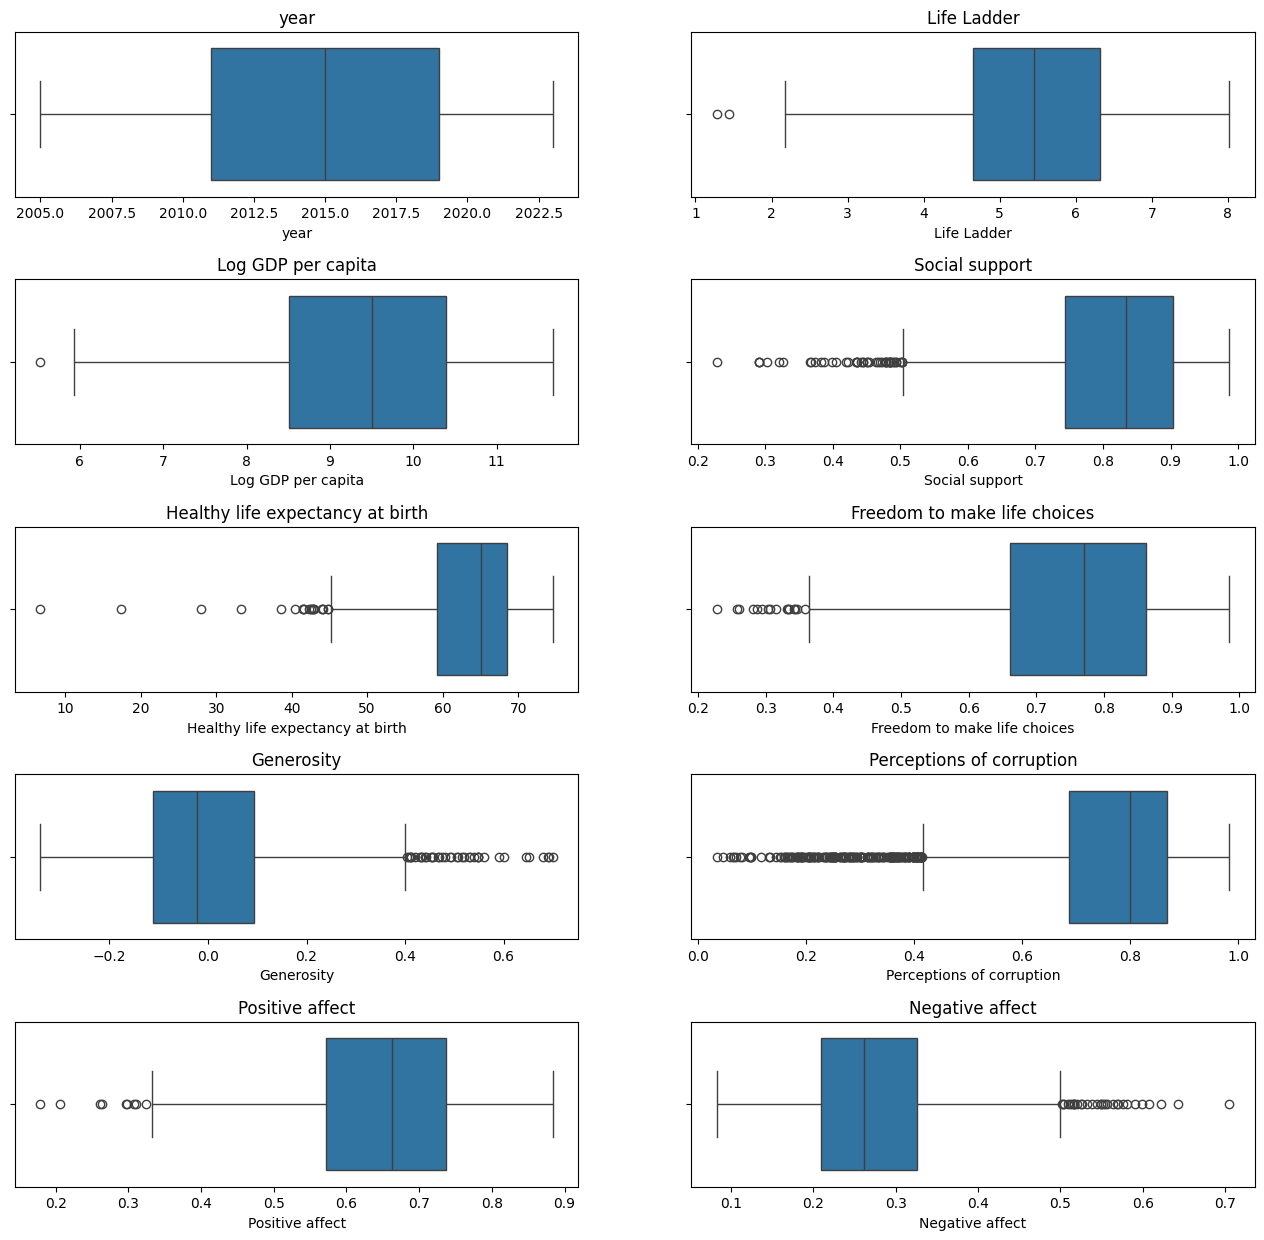

In [32]:
# Revisión de existencia de Outliers en variables numéricas
cols_num = ['year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

# Crear la figura con 5 filas y 2 columnas
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16, 15))  # Tamaño ajustado para mejor visualización
fig.subplots_adjust(hspace=0.5)  # Ajuste del espacio vertical entre gráficos

# Recorrer las variables numéricas y graficar cada boxplot
for i, col in enumerate(cols_num):
    row = i // 2  # Índice de la fila
    col_idx = i % 2  # Índice de la columna
    sns.boxplot(x=col, data=df_merged, ax=ax[row, col_idx])  # Graficar en el eje correspondiente
    ax[row, col_idx].set_title(col)  # Establecer título de cada boxplot

# Mostrar el gráfico
plt.show()

Análisis de las diferentes variables del dataset a través de boxplots. Esto, para analizar outliers, y tener un panorama general de como se distribuyen los datos dentro de cada una de las variables:

1. **Year (Año)**:

- El rango de los datos va de 2005 a 2022, donde se encuentran distribuidos los datos mayormente en los años 2011 a 2018. No se ven outliers.

2. **Life Ladder (Escalera de vida)**:

- Mide la percepción de las personas sobre su bienestar general.
La mediana está alrededor de 5.5, lo que significa que, en general, las personas evalúan su felicidad en ese nivel en una escala de 0 a 10.
Hay algunos datos atípicos en el extremo izquierdo, lo que sugiere que en algunos países las personas se sienten mucho menos felices que en otros países.

3. **Log GDP per capita (Logaritmo del PIB per cápita)**:

- Representa el bienestar económico. Un PIB per cápita más alto generalmente está asociado con mayor bienestar.
La mediana está alrededor de 9.5, lo que sugiere que la mayoría de los países tienen un nivel económico moderado.
No hay muchos datos atípicos, lo que indica que la mayoría de los países tienen valores similares en esta medida.

4. **Social support (Apoyo social)**:

- Mide la percepción de las personas sobre el apoyo que reciben de su entorno.
La mediana está en 0.8, lo que sugiere que la mayoría de las personas sienten que tienen un buen apoyo social.
Los outliers en el extremo izquierdo, sugiere que personas de algunos países sienten que tienen muy poco apoyo social.

5. **Healthy life expectancy at birth (Esperanza de vida saludable al nacer)**:

- Representa cuántos años una persona puede esperar vivir con buena salud.
La mediana está alrededor de 60 años, con algunos valores atípicos más bajos. Lo que indica que en general, las personas estiman llegar con buena salud hasta un poco antes de ser adultos mayores.

6. **Freedom to make life choices (Libertad para tomar decisiones)**:

- Mide la percepción de las personas sobre su libertad para tomar decisiones.
La mediana está alrededor de 0.75, lo que sugiere que la mayoría de las personas sienten que tienen una cantidad considerable de libertad para tomar decisiones importantes.
Hay datos atípicos en el extremo izquierdo, lo que significa que algunas personas sienten muy poca libertad.

7. **Generosity (Generosidad)**:

- Mide la disposición de las personas a ser generosas.
La mediana es cercana a cero, lo que indica que, en promedio, la generosidad no es un factor relevante.
Existen muchos valores atípicos al lado derecho del boxplot, lo que significa que algunos países son mucho más generosos que otros.

8. **Perceptions of corruption (Percepciones de corrupción)**:

- Mide cómo perciben las personas los niveles de corrupción en sus países.
La mediana está cerca de 0.75, lo que indica que muchas personas consideran que la corrupción es un problema moderado o serio.
Existen muchos valores atípicos en la parte izquierda, lo que sugiere que algunos países perciben niveles muy bajos de corrupción.

9. **Positive affect (Afecto positivo)**:

- Mide el grado de emociones positivas que experimentan las personas, como felicidad o risas.
La mediana está alrededor de 0.7, lo que indica que la mayoría de las personas experimentan emociones positivas regularmente.
Existen algunos valores atípicos en la parte inferior, lo que sugiere que algunas personas experimentan niveles muy bajos de emociones positivas.

10. **Negative affect (Afecto negativo)**:

- Mide el grado de emociones negativas, como preocupación o tristeza.
La mediana está alrededor de 0.2 y 0.3, lo que indica que la mayoría de las personas no experimentan emociones negativas de manera frecuente.
Hay muchos valores atípicos en la parte superior, lo que indica que algunas personas experimentan emociones negativas con mayor frecuencia que en otros países.

In [33]:
# Análisis de la existencia de valores nulos
valores_nulos = df_merged.isnull().sum()
print("Valores faltantes iniciales por columna:\n", valores_nulos)

Valores faltantes iniciales por columna:
 Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
Continent                             0
dtype: int64


#### **Paso 4: Limpieza de Datos**

1. El proceso de limpieza de datos comenzará utilizando el criterio de eliminar aquellas filas (países) donde la cantidad de valores faltantes superen el 50%.

In [34]:
# Eliminar filas con más del 50% de valores faltantes

param = df.shape[1] * 0.5

# Identificar las filas que tienen más del 50% de valores faltantes

filas_elim = df[df.isnull().sum(axis=1) > param]

# Mostrar las filas que tienen más del 50% de valores faltantes
print(filas_elim)
df_cleaned = df_merged.dropna(thresh=param)

              Country name  year  Life Ladder  Log GDP per capita  \
135                Bahrain  2014        6.165              10.802   
1123                Kuwait  2014        6.180              10.926   
1721                 Qatar  2015        6.375              11.532   
2197  United Arab Emirates  2014        6.540              11.072   
2307               Vietnam  2017        5.175               9.111   

      Social support  Healthy life expectancy at birth  \
135              NaN                             65.96   
1123             NaN                             70.00   
1721             NaN                             66.40   
2197             NaN                             65.34   
2307             NaN                             65.10   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
135                            NaN         NaN                        NaN   
1123                           NaN         NaN                        NaN   
1721 

2. Para los valores faltantes que aún existen en el dataframe, serán reemplazados con la mediana respectiva. Para esto, se considerarán 2 criterios de imputación de datos; el primero nos indica que se reemplazarán los datos vacíos con la mediana del país respectivo. Por otro lado, el segundo nos indica que en caso de no encontrar datos de la columna respectiva y tampoco del país, se completará con la mediana del continente. 

In [35]:
# Función para rellenar los valores faltantes por país y continente
def rellenar_faltantes(df, column):
    # Rellenar primero con la mediana por país
    df[column] = df.groupby('Country name')[column].transform(lambda x: x.fillna(x.median()))
    
    # Rellenar los que aún estén faltantes con la mediana por continente
    df[column] = df.groupby('Continent')[column].transform(lambda x: x.fillna(x.median()))
       
    return df

# Columnas consideradas para la  imputacion de datos
cols_a_rellenar = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                   'Positive affect', 'Negative affect']

# Aplicar la función a todas las columnas numéricas con valores faltantes
for column in cols_a_rellenar:
    df_cleaned = rellenar_faltantes(df_cleaned, column)

3. A continuación, se verifica la existencia de valores duplicados y en el caso de existir, se procede a su eliminación

In [36]:
# Verificar y eliminar filas duplicadas
filas_duplicadas = df_cleaned.duplicated().sum()
print(f"Número de filas duplicadas: {filas_duplicadas}")

# Eliminar duplicados
df_cleaned = df_cleaned.drop_duplicates()

Número de filas duplicadas: 0


4. Se verifica la existencia de valores nulos luego de haber aplicado los pasos anteriores

In [37]:
# Revisar valores faltantes después de la limpieza
valores_nulos_post = df_cleaned.isnull().sum()
print("Valores faltantes después de la limpieza:\n", valores_nulos_post)

Valores faltantes después de la limpieza:
 Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
Continent                           0
dtype: int64


#### **Paso 5: Almacenamiento de dataframe limpio**

In [38]:
# Guardar el dataset limpio
df_cleaned.to_csv("../Data/dataset_limpio.csv", index=False)